In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
temps = calc_temps('2016-01-01','2016-12-31')
temps

[(56.0, 74.14421827631008, 84.0)]

Text(0, 0.5, 'Temp (F)')

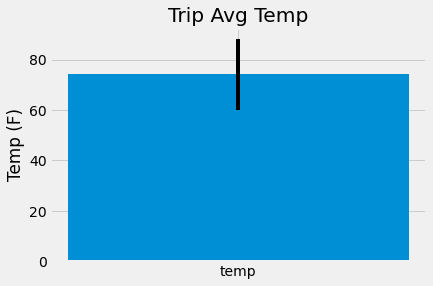

In [11]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = (temps[0][2]-temps[0][0])/2
plt.bar('temp',temps[0][1],yerr=yerr)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")

### Daily Rainfall Average

In [12]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.date,Measurement.prcp,Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation]

query = session.query(*sel).\
    filter(Measurement.station == Station.station).\
    filter(func.strftime("%Y-%m-%d", Measurement.date) >= '2017-08-01').\
    filter(func.strftime("%Y-%m-%d", Measurement.date) <= '2017-08-07').\
    order_by(Measurement.prcp.desc()).all()
query
prcp_df = pd.DataFrame(query)
prcp_df

,date,prcp,station,name,latitude,longitude,elevation
0,2017-08-02,0.25,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,2017-08-01,0.12,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
2,2017-08-05,0.06,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,2017-08-03,0.06,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
4,2017-08-02,0.05,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
5,2017-08-07,0.05,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
6,2017-08-04,0.04,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
7,2017-08-01,0.02,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
8,2017-08-04,0.02,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
9,2017-08-03,0.01,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


In [13]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [14]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
normals = []
# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
trip_dates = pd.date_range(start_date, end_date)
# Strip off the year and save a list of strings in the format %m-%d
td = trip_dates.strftime("%m-%d").tolist()
td

# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
for date in td:
    normals.append(daily_normals(date))
    
normals

newlist = [item for items in normals for item in items]
newlist

[(67.0, 75.54, 83.0),
 (68.0, 75.60377358490567, 84.0),
 (70.0, 76.61111111111111, 85.0),
 (69.0, 76.71153846153847, 84.0),
 (69.0, 76.14814814814815, 82.0),
 (67.0, 76.25, 83.0),
 (71.0, 77.15686274509804, 83.0)]

In [17]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(data=newlist,index=td,columns= ["Tmin","Tave","Tmax"])
df

,Tmin,Tave,Tmax
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0
08-03,70.0,76.611111,85.0
08-04,69.0,76.711538,84.0
08-05,69.0,76.148148,82.0
08-06,67.0,76.250000,83.0
08-07,71.0,77.156863,83.0


Text(0.5, 0, 'Dates (2018)')

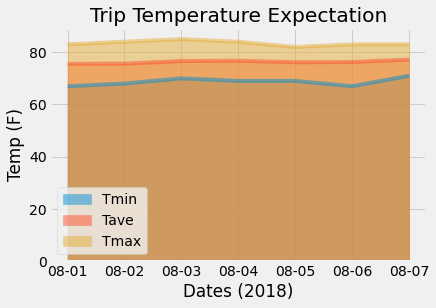

In [18]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot.area(stacked=False)
plt.title("Trip Temperature Expectation")
plt.ylabel("Temp (F)")
plt.xlabel("Dates (2018)")

## Close Session

In [19]:
session.close()